

#MENTORÍA 06
#**Cambio climático y ML: cómo mitigar las emisiones de CO2 mediante la reducción del consumo energético en construcciones edilicias**

**TP N°1: Análisis y visualización**

Fecha de entrega: **1 de julio**

##Consignas generales
Les propongo la elaboración de un informe que deberá apuntar a un público técnico, pero sin conocimientos específicos en el tema. Añadir gráficos y conclusiones obtenidas durante el desarrollo del práctico.


Algunas recomendaciones:
- Utilizar celdas de texto, que servirán para fundamentar sus decisiones, intercaladas con celdas de código, donde verterán el código implementado. No se recomienda utilizar comillas entre el código para explicar las tomas de decisión.
- En la primera celda de código deberían importar todas las librerías que van a utilizar en todo el trabajo práctico.
- Es super recomendable segmentar el trabajo en tópicos o tareas.




## Análisis descriptivo

Entender qué tipos de features poseen los dataset, qué significan y cómo se relacionan entre ellos.
- ¿Cuántos datos tiene mi data set?
- ¿Cuántas features tengo? ¿De qué tipo son? 
- ¿A cuáles les deberé aplicar alguna transformación?  
- ¿Cuál es mi variable target? ¿Qué significa?
- ¿Todas las features aportan información diferente? 
- ¿Existen datos faltantes? ¿Qué me convendrá hacer con ellos?

## Análisis estadístico

Seleccionar algunos features que crean relevantes para el problema. Utilizar los gráficos y cálculos que le parezcan más apropiados para llegar a las conclusiones. 

- ¿Qué herramienta/s es/son la/s más adeduada/s para seleccionar features de interés? ¿Cuál es el criterio para realizar dicha selección?
- ¿Existen outliers para estos features?
- ¿Hay valores faltantes?
- ¿Hay valores que no corresponden?
- ¿Que decisión tomarían para completar o eliminar estos outliers y faltantes?
- ¿Cómo es la distribución de las variables en el dataset?
- ¿Existe correlación entre algunas de las variables?

# 1) IMPORTACION DE LIBRERIAS 

En la siguiente Notebook se utilizaran las siguientes librerias:
* [Pandas:](https://pandas.pydata.org/docs/) para la manipulación y análisis de datos estructurados, como tablas y hojas de cálculo.
* [NumPy:](https://numpy.org/doc/) para cálculos numéricos y operaciones con matrices y arreglos multidimensionales.
* [Seaborn:](https://seaborn.pydata.org/) para la creación de gráficos estadísticos atractivos y bien diseñados.
* [Matplotlib:](https://matplotlib.org/stable/index.html) para crear gráficos personalizables.
* [Missingno: ](https://github.com/ResidentMario/missingno) herramientas de visualización de datos faltantes.

In [4]:
# Instalacion
!pip install pandas numpy seaborn matplotlib missingno 

In [2]:
# Importacion
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# 2) ANALISIS DESCRIPTIVO 

Importamos el data set a utilizar que se encuentra en el repositorio [Cambio-climatico-y-ML](https://github.com/TamaraMaggioni/Cambio-climatico-y-ML). En esta ocasion, se carga el archivo data.csv directamente en el entorno de vsc

In [3]:
df = pd.read_csv(r"C:\Users\pablo\OneDrive\Escritorio\PABLO\CURSOS\Diplodatos_Famaf\Climate_change_and_ML\data\data.csv")

Mediante el metodo _**.shape**_ vemos el tamaño del data set

In [4]:
print(f"Filas: {df.shape[0]}\nColumnas: {df.shape[1]}")

Filas: 75757
Columnas: 64


Mediante el metodo _**.info()**_ de pandas podemos tener una visión rápida de la estructura de los datos.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

De las 64 variables del data set, tenemos 3 tipos de datos distintos:
* 37 son del tipo **int**
* 24 son del tipo **float**
* 3 son del tipo **string**

Para poder utilizar el data set con lo diferentes modelos de predicion, sera necesario transformar las variables categoricas (_'State_Factor'_, _'building_class'_ y _'facility_type'_) a numericas. 

A continuacion podemos ver la cantidad de registors unicos que tiene cada una de ellas para tener una idea de la cantidad de columnas que se agregaran al data set.

In [6]:
columnasCategoricas = df.select_dtypes(exclude=np.number).columns
print(columnasCategoricas)
df[columnasCategoricas].nunique()

Index(['State_Factor', 'building_class', 'facility_type'], dtype='object')


State_Factor       7
building_class     2
facility_type     60
dtype: int64

La variable _'building_class'_ solo aportara 2 columnas nuevas al data set, mientras que _'State_Factor'_ y _'facility_type'_ aportaria 7 y 60, respectivamente.

Por lo tanto, sera necesario analizar en profundidad la distribucion de estas variable para determianr si es posible reducir el tamaño del data set.
Se realiza un grafico para determinar con que frecuencia aparecen cada valor unico.

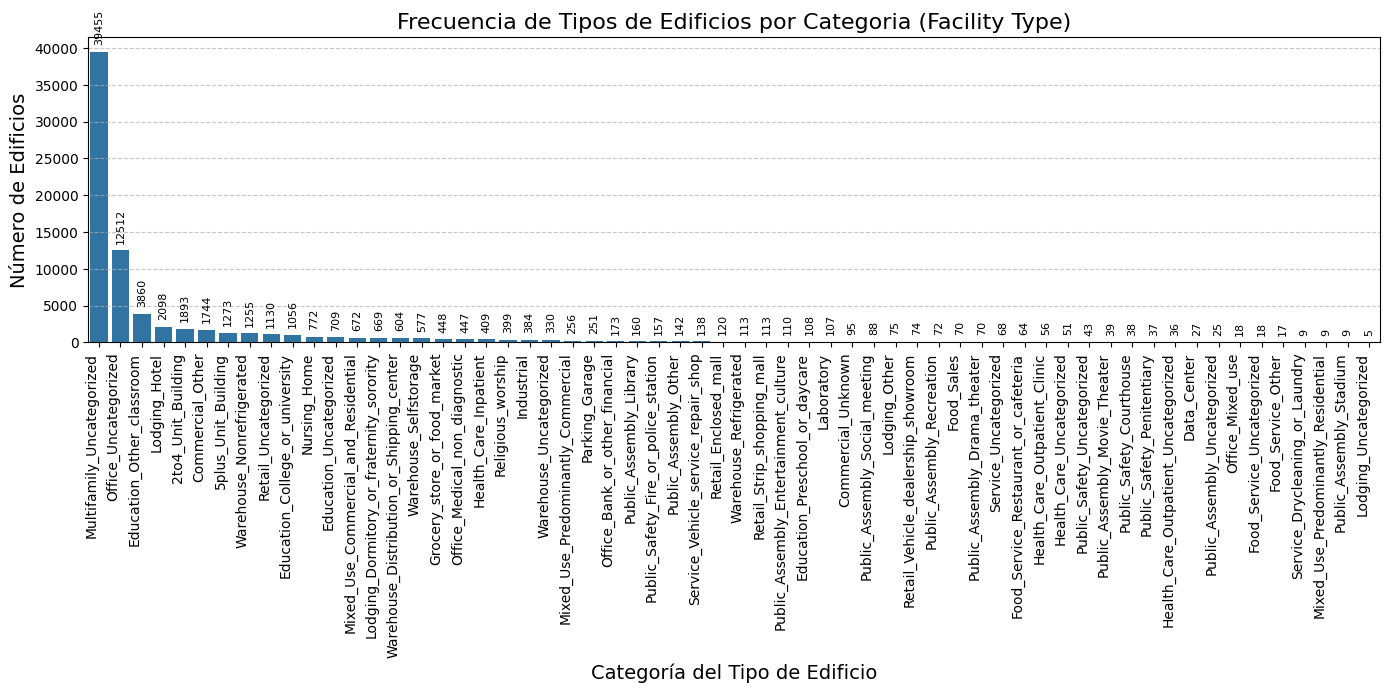

In [7]:
# Se crea el grafico
plt.figure(figsize=(14, 7))
ax = sns.countplot(data=df, x='facility_type', order=df['facility_type'].value_counts().index)

# Titulo y etiquetas
plt.title('Frecuencia de Tipos de Edificios por Categoria (Facility Type)', fontsize=16)
plt.xlabel('Categoría del Tipo de Edificio', fontsize=14)
plt.ylabel('Número de Edificios', fontsize=14)

# Rotacion del texto del eje x para mejor legibilidad
plt.xticks(rotation=90, ha='right', fontsize=10)

# Agregado de grilla para mejorar la visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de conteo encima de las barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge', rotation=90, padding=5, fontsize=8) 

# Mejorar el espaciado
plt.tight_layout()

plt.show()

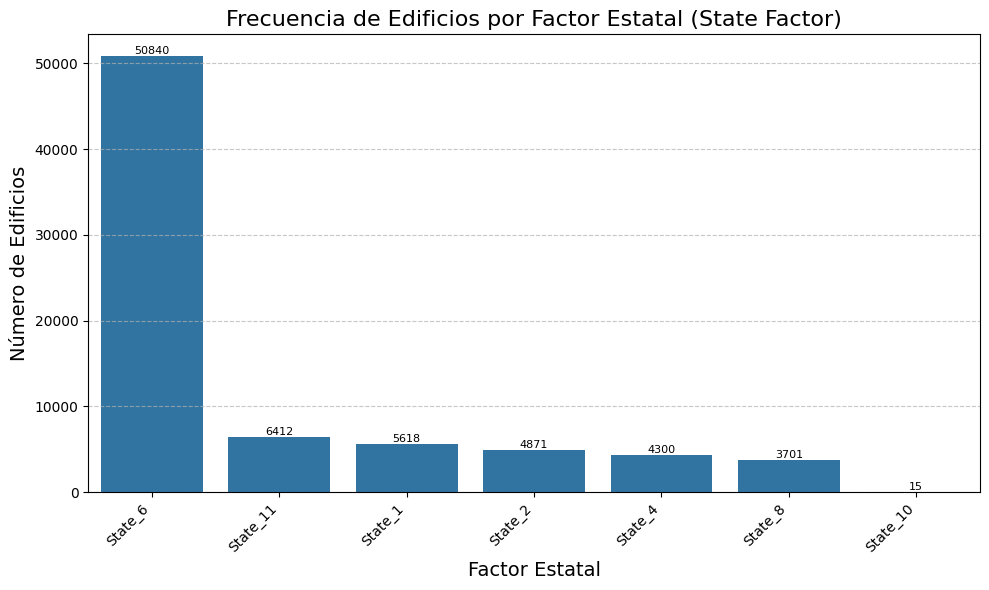

In [8]:
# Se crea el grafico
plt.figure(figsize=(10, 6)) 
ax = sns.countplot(data=df, x='State_Factor', order=df['State_Factor'].value_counts().index)

# Titulo y etiquetas
plt.title('Frecuencia de Edificios por Factor Estatal (State Factor)', fontsize=16)
plt.xlabel('Factor Estatal', fontsize=14)
plt.ylabel('Número de Edificios', fontsize=14)

# Rotacion del texto del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right', fontsize=10)

# Agregado de grilla para mejorar la visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de conteo encima de las barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8) 

# Mejorar el espaciado
plt.tight_layout()

plt.show()

Se puede determinar que es posible eliminar algunos registros que no son muy frecuentes en el data set.

La variable a predecir es
* _**site_eui**_: cantidad de calor y electricidad consumidos por un edificio (medido en kBtu/ft2)

Se realiza el grafico de la matriz de correlacion para la variable a predecir.

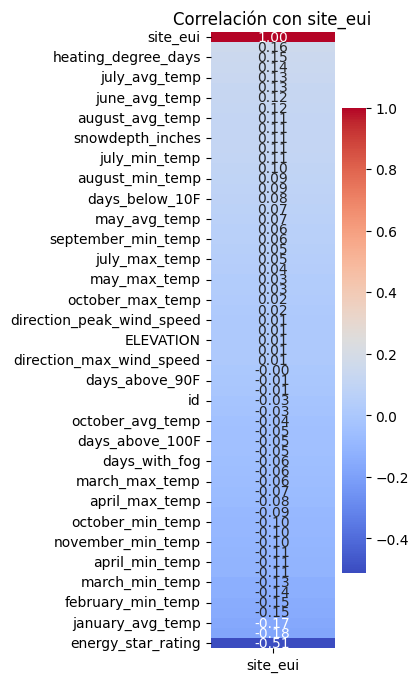

In [9]:
# Seleccionar solo las columnas numéricas para la matriz de correlación
df_numeric = df.select_dtypes(include=np.number)

# Generar la matriz de correlación
correlation_matrix = df_numeric.corr()

# Resaltar la columna 'site_eui' en la matriz de correlación usando un mapa de calor
plt.figure(figsize=(2, 8))
sns.heatmap(correlation_matrix[['site_eui']].sort_values(by='site_eui', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación con site_eui')
plt.show()

Se observa que no hay muchas variables con una correlacion muy elevada (> al 0,5).

## CONCLUSIONES
* ¿Cuántos datos tiene mi data set?

* ¿Cuántas features tengo? ¿De qué tipo son?

* ¿A cuáles les deberé aplicar alguna transformación?

* ¿Cuál es mi variable target? ¿Qué significa?

* ¿Todas las features aportan información diferente?

* ¿Existen datos faltantes? ¿Qué me convendrá hacer con ellos?

# 3) ANALISIS ESTADISTICO

## CONCLUSIONES
* ¿Qué herramienta/s es/son la/s más adeduada/s para seleccionar features de interés? ¿Cuál es el criterio para realizar dicha selección?

* ¿Existen outliers para estos features?

* ¿Hay valores faltantes?

* ¿Hay valores que no corresponden?

* ¿Que decisión tomarían para completar o eliminar estos outliers y faltantes?

* ¿Cómo es la distribución de las variables en el dataset?

* ¿Existe correlación entre algunas de las variables?